In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import numpy as np
import pandas as pd

Using TensorFlow backend.
/home/e530toadwei/.conda/envs/tensorflow_gpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
def plot_image_lables_prediction(images,lables,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25 :num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap="binary")
        title = "label="+str(lables[idx])
        if len(prediction)>0:
            title +=",prediction="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])

        idx+=1
    plt.show()

In [4]:
x_train4D=x_train.reshape(x_train.shape[0],28,28,1).astype("float32")
x_test4D=x_test.reshape(x_test.shape[0],28,28,1).astype("float32")

In [5]:
x_test4D_NL=x_test4D/255
x_train4D_NL=x_train4D/255

In [6]:
y_train_OH=np_utils.to_categorical(y_train)
y_test_OH=np_utils.to_categorical(y_test)

In [7]:
xx = Sequential()

In [8]:
xx=Sequential()

In [9]:
xx.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation="relu"))

In [10]:
xx.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
xx.add(Conv2D(filters=36,kernel_size=(5,5),padding="same",activation='relu'))

In [12]:
xx.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
xx.add(Dropout(0.25))

In [14]:
xx.add(Flatten())

In [15]:
xx.add(Dense(128,activation='relu'))

In [16]:
xx.add(Dropout(0.5))

In [17]:
xx.add(Dense(10,activation='softmax'))

In [18]:
print(xx.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [19]:
xx.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [32]:
train_history=xx.fit(x=x_train4D_NL,y=y_train_OH,validation_split=0.2,epochs=100,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 1s - loss: 0.0376 - acc: 0.9885 - val_loss: 0.0304 - val_acc: 0.9913
Epoch 2/100
 - 1s - loss: 0.0343 - acc: 0.9889 - val_loss: 0.0305 - val_acc: 0.9918
Epoch 3/100
 - 1s - loss: 0.0318 - acc: 0.9906 - val_loss: 0.0302 - val_acc: 0.9909
Epoch 4/100
 - 1s - loss: 0.0288 - acc: 0.9911 - val_loss: 0.0293 - val_acc: 0.9917
Epoch 5/100
 - 1s - loss: 0.0268 - acc: 0.9916 - val_loss: 0.0303 - val_acc: 0.9908
Epoch 6/100
 - 1s - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0326 - val_acc: 0.9914
Epoch 7/100
 - 1s - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0286 - val_acc: 0.9916
Epoch 8/100
 - 1s - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0308 - val_acc: 0.9911
Epoch 9/100
 - 1s - loss: 0.0221 - acc: 0.9927 - val_loss: 0.0301 - val_acc: 0.9917
Epoch 10/100
 - 1s - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0314 - val_acc: 0.9917
Epoch 11/100
 - 1s - loss: 0.0221 - acc: 0.9927 - val_loss: 0.0296 - val_acc: 0.9920
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0331 - val_acc: 0.9934
Epoch 98/100
 - 1s - loss: 0.0054 - acc: 0.9983 - val_loss: 0.0320 - val_acc: 0.9938
Epoch 99/100
 - 1s - loss: 0.0061 - acc: 0.9981 - val_loss: 0.0349 - val_acc: 0.9932
Epoch 100/100
 - 1s - loss: 0.0056 - acc: 0.9979 - val_loss: 0.0313 - val_acc: 0.9936


In [33]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

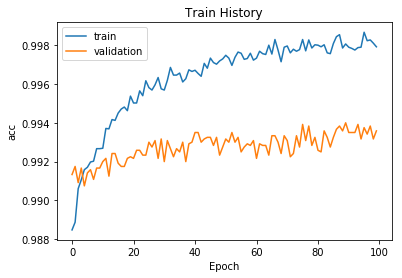

In [34]:
show_train_history(train_history,'acc','val_acc')

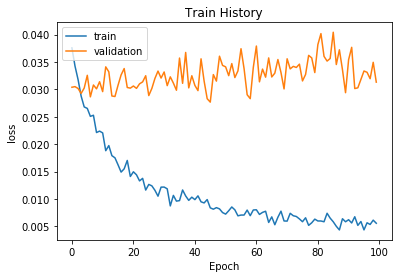

In [35]:
show_train_history(train_history,'loss','val_loss')

In [36]:
scroes = xx.evaluate(x_test4D_NL,y_test_OH)


10000/10000 [==============================] - 0s 32us/step


In [37]:
prediction = xx.predict_classes(x_test4D_NL)

10000/10000 [==============================] - 0s 29us/step


In [38]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

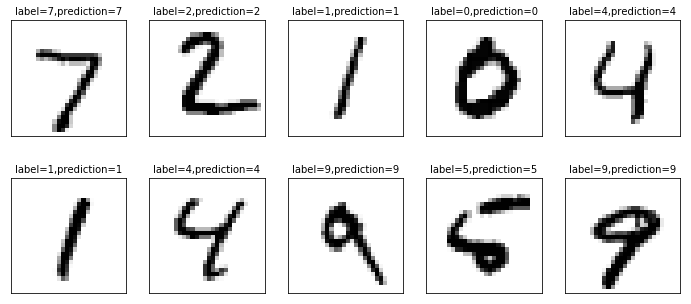

In [39]:
plot_image_lables_prediction(x_test,y_test,prediction=prediction,idx=0)

In [40]:
pd.crosstab(y_test,prediction,rownames=["lable"],colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
lable,,,,,,,,,,
0,977,0,0,0,0,0,1,0,1,1
1,0,1133,0,1,0,0,0,0,1,0
2,0,1,1025,1,0,0,0,5,0,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,979,0,0,1,0,2
5,0,0,0,7,0,883,1,0,1,0
6,3,2,0,0,2,2,948,0,1,0
7,0,0,0,0,0,0,0,1027,1,0
8,1,1,0,1,0,0,0,0,970,1


In [41]:
df = pd.DataFrame({'lable':y_test,"prediction":prediction})

In [44]:
df[(df.lable==2)&(df.prediction==7)]

,lable,prediction
321,2,7
1790,2,7
4176,2,7
9664,2,7
9839,2,7


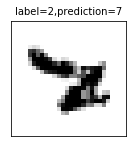

In [46]:
plot_image_lables_prediction(x_test,y_test,prediction,idx=4176,num=1)